### **Goal:** to determine if Fandango's ratings in 2015 had a bias towards rating movies better to sell more tickets.

### **Data:** https://github.com/fivethirtyeight/data/tree/master/fandango

-----

`all_sites_scores.csv` contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015.

Column | Definition
--- | -----------
FILM | The film in question
RottenTomatoes | The Rotten Tomatoes Tomatometer score  for the film
RottenTomatoes_User | The Rotten Tomatoes user score for the film
Metacritic | The Metacritic critic score for the film
Metacritic_User | The Metacritic user score for the film
IMDB | The IMDb user score for the film
Metacritic_user_vote_count | The number of user votes the film had on Metacritic
IMDB_user_vote_count | The number of user votes the film had on IMDb

----
----

#### fandango_scape.csv

`fandango_scrape.csv` contains every film 538 pulled from Fandango.

Column | Definiton
--- | ---------
FILM | The movie
STARS | Number of stars presented on Fandango.com
RATING |  The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.
VOTES | number of people who had reviewed the film at the time we pulled it.

In [2]:
#Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Reading data
fandango = pd.read_csv("fandango_scrape.csv")

In [4]:
#Checking columns and overview of data
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [5]:
#checking length of data, null values,data types
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [6]:
#checking other details
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


<AxesSubplot:xlabel='RATING', ylabel='VOTES'>

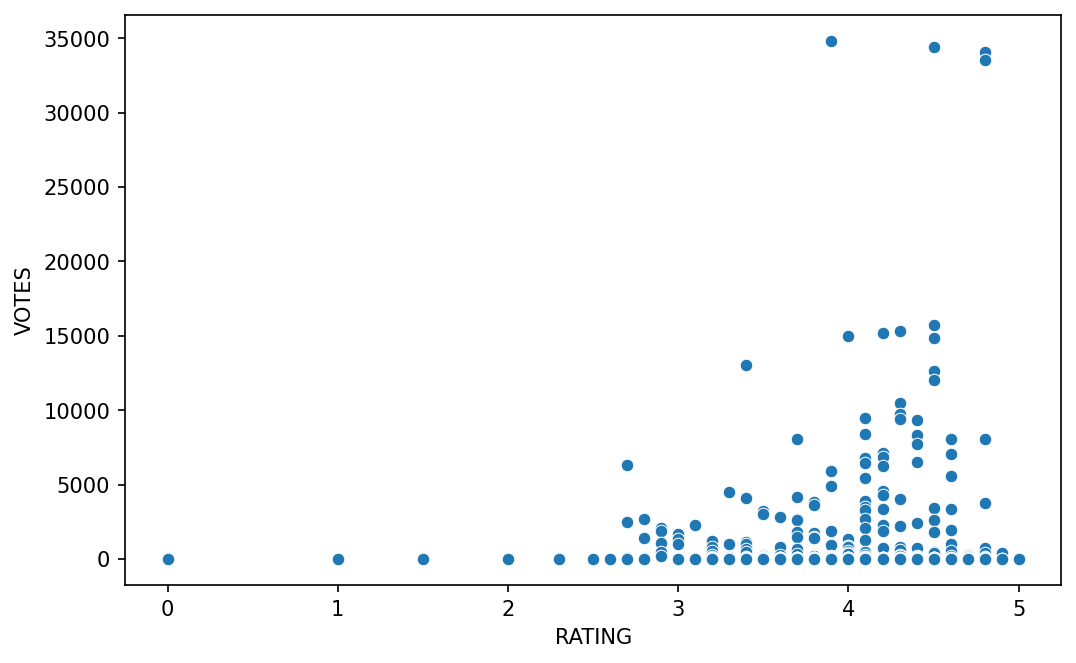

In [7]:
#exploring the relationship between popularity of a film and its rating. Creating a scatterplot showing the relationship between rating and votes

plt.figure(figsize=(8,5),dpi=151)
sns.scatterplot(data=fandango,x='RATING',y='VOTES')

In [8]:
#Calculating the correlation between the columns

fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [9]:
#Creating Seperate YEAR column from FILM names
fandango['YEAR']=fandango['FILM'].apply(lambda x:x.split('(')[-1][:4])

In [10]:
fandango

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


In [12]:
#Checking the number of movies per year

moviesperyear=fandango.groupby('YEAR').count()['FILM']

In [13]:
moviesperyear

YEAR
1964      1
2012      1
2014     23
2015    478
2016      1
Name: FILM, dtype: int64

<AxesSubplot:xlabel='YEAR', ylabel='count'>

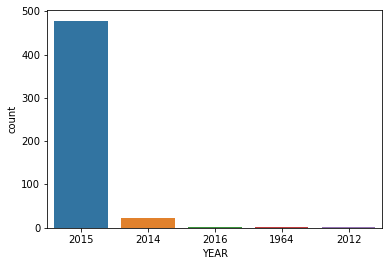

In [14]:
#Visualization of the count of movies per year with a plot

sns.countplot(data=fandango,x='YEAR')

In [15]:
#Top 10 Highest voted Movies

fandango.sort_values('VOTES',ascending=False).head(10)

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [16]:
#Movies with 0 votes
len(fandango[fandango['VOTES']==0])

69

In [17]:
#Removing movies with 0 votes

fandango=fandango[fandango['VOTES']!=0]

In [18]:
fandango

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015
431,The Intern (2015),5.0,5.0,1,2015
432,The Park Bench (2015),5.0,5.0,1,2015
433,The Wanted 18 (2015),5.0,5.0,1,2015


In [20]:
ReviewedFilms=fandango[fandango['VOTES']!=0]

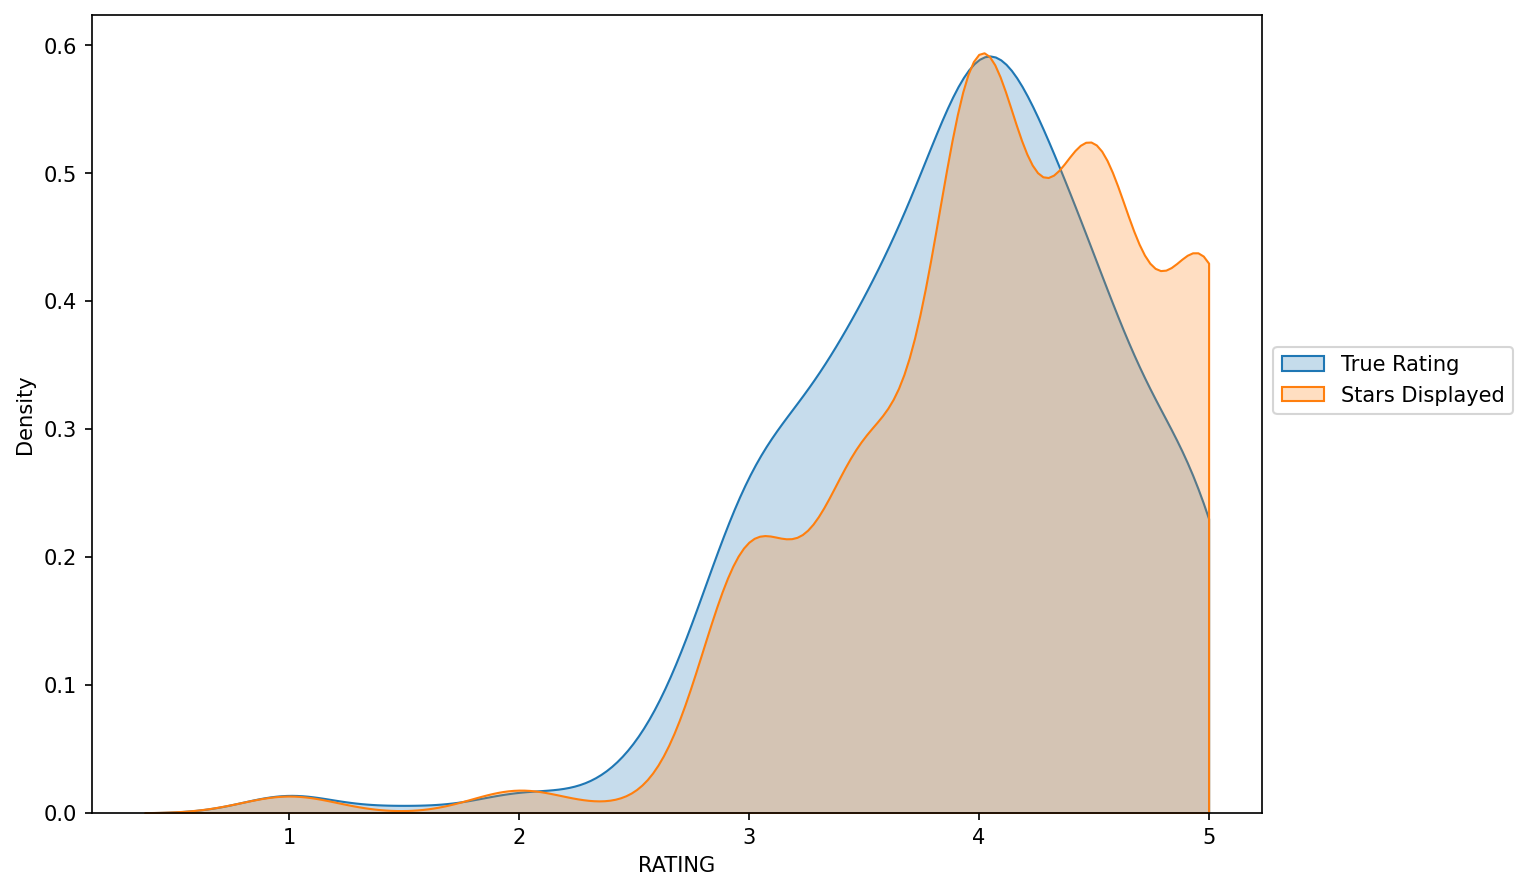

In [21]:
#Distribution of the STARS and RATINGS (To check if there is any difference between displayed and actual rating)

plt.figure(figsize=(10,7),dpi=151)
sns.kdeplot(x=ReviewedFilms['RATING'],shade=True,label='True Rating',clip=(0,5))
sns.kdeplot(x=ReviewedFilms['STARS'],shade=True,label='Stars Displayed',clip=(0,5))
plt.legend(loc=(1.01,0.5))

In [22]:
#Creating new column of the different between STARS displayed versus true RATING
fandango['STARS_DIFF']=round(fandango['STARS']-fandango['RATING'],2)

C:\Users\pkana\AppData\Local\Temp/ipykernel_15000/3963502684.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fandango['STARS_DIFF']=round(fandango['STARS']-fandango['RATING'],2)


In [23]:
fandango

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


<AxesSubplot:xlabel='STARS_DIFF', ylabel='count'>

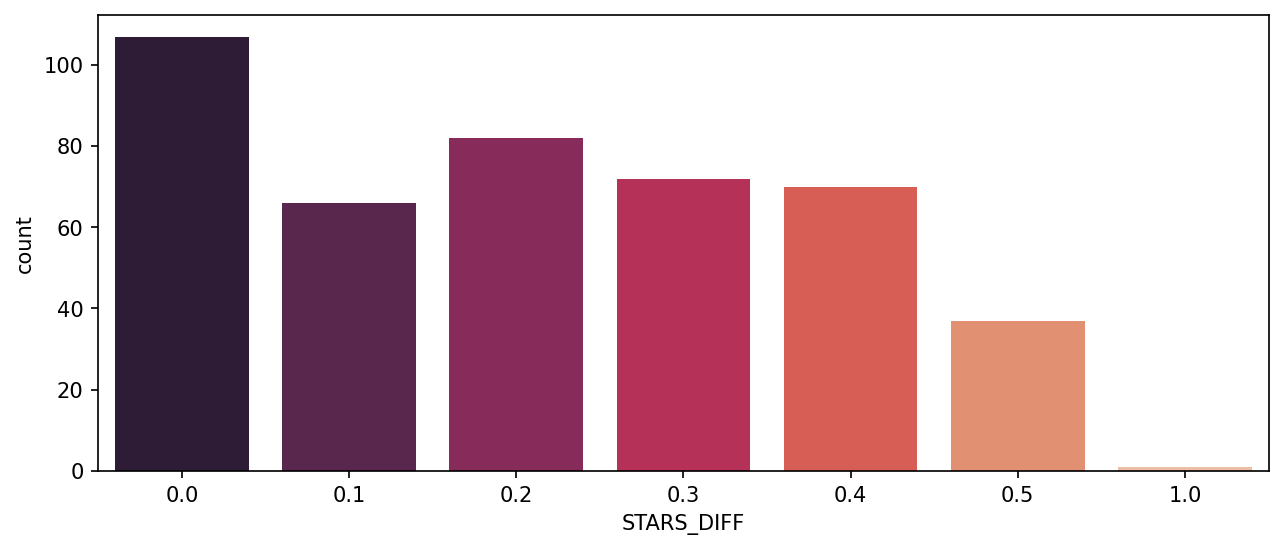

In [24]:
#creating count plot to display the number of times a certain difference occurs

plt.figure(figsize=(10,4),dpi=151)
sns.countplot(x=fandango['STARS_DIFF'],palette='rocket')

In [25]:
#Above plot shows there is a movie with over 1 star difference than its true rating, checking the same movie
fandango[fandango['STARS_DIFF']==1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


In [26]:
#Now Let's now compare the scores from Fandango to other movies sites and see how they compare.
all_sites = pd.read_csv("all_sites_scores.csv")

In [27]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [28]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [29]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


<AxesSubplot:xlabel='RottenTomatoes', ylabel='RottenTomatoes_User'>

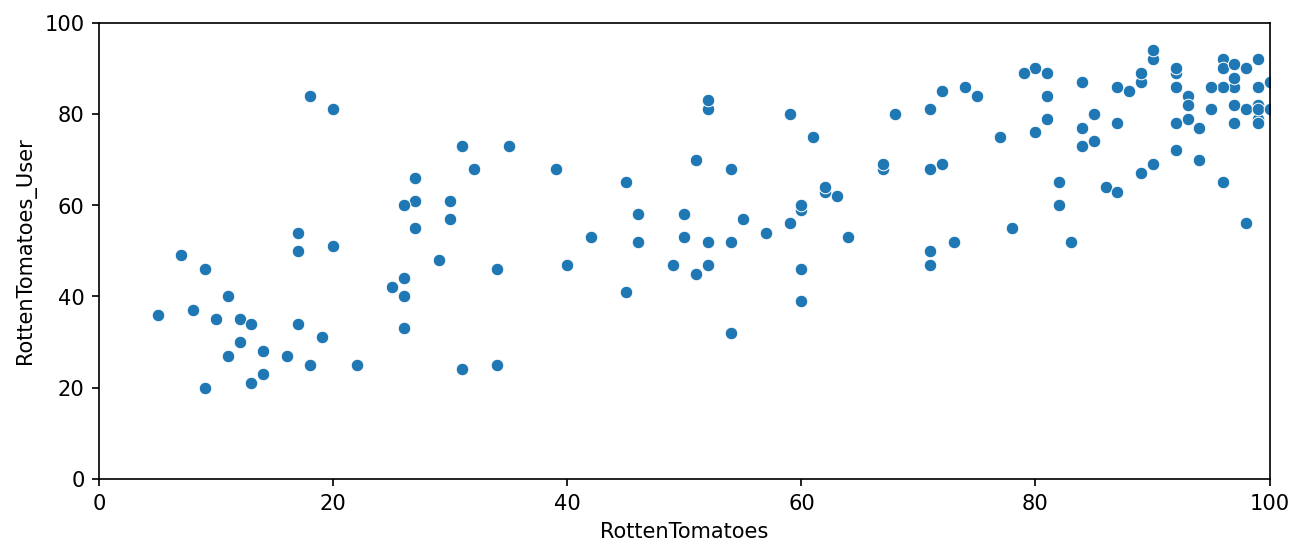

In [30]:
#Checking relationship between Rotten Tomatoes Critic reviews and Rotten Tomatoes User reviews.

plt.figure(figsize=(10,4),dpi=151)
plt.xlim(0,100)
plt.ylim(0,100)


sns.scatterplot(x=all_sites['RottenTomatoes'],y=all_sites['RottenTomatoes_User'])

In [31]:
#Creating a new column based off the difference between critics ratings and users ratings for Rotten Tomatoes. 
all_sites['Rotten_Diff']=all_sites['RottenTomatoes']-all_sites['RottenTomatoes_User']

In [32]:
all_sites

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14
...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367,9
142,'71 (2015),97,82,83,7.5,7.2,60,24116,15
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345,19
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955,19


In [33]:
#Calculating the Mean Absolute Difference between RT scores and RT User scores
abs(all_sites['Rotten_Diff']).mean()

15.095890410958905

<Figure size 1887x444 with 0 Axes>

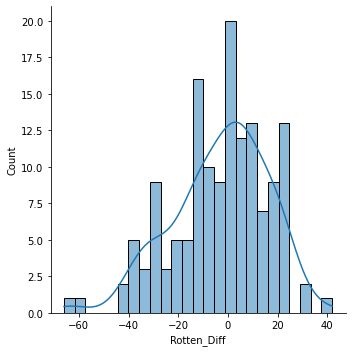

In [34]:
#Ploting the distribution of the differences between RT Critics Score and RT User Score.

plt.figure(figsize=(17,4),dpi=111)

sns.displot(x=all_sites['Rotten_Diff'],kde=True,bins=25,label='RT Critics Score minus RT User Score')


<Figure size 777x444 with 0 Axes>

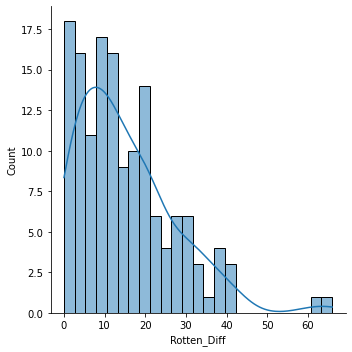

In [35]:
#creating a distribution showing the absolute value difference between Critics and Users on Rotten Tomatoes.

plt.figure(figsize=(7,4),dpi=111)

sns.displot(x=abs(all_sites['Rotten_Diff']),kde=True,bins=25,label='RT Critics Score minus RT User Score')


In [36]:
#top 5 movies users rated higher than critics on average

all_sites.sort_values('Rotten_Diff').head(5)[['FILM','Rotten_Diff']]

,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
134,The Longest Ride (2015),-42
105,Hitman: Agent 47 (2015),-42
125,The Wedding Ringer (2015),-39


In [37]:
#top 5 movies critics scores higher than users on average

all_sites.sort_values('Rotten_Diff',ascending=False).head(5)[['FILM','Rotten_Diff']]

,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
145,"Kumiko, The Treasure Hunter (2015)",24
37,Welcome to Me (2015),24


<AxesSubplot:xlabel='Metacritic', ylabel='Metacritic_User'>

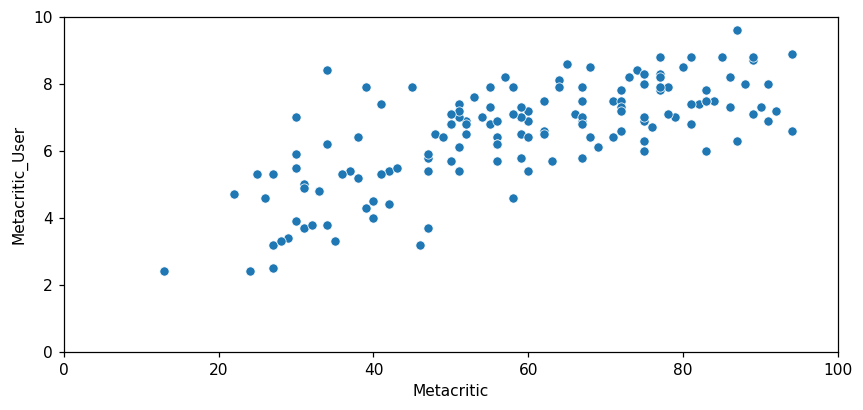

In [38]:
#scatterplot of the Metacritic Rating versus the Metacritic User rating.

plt.figure(figsize=(9,4),dpi=111)
plt.xlim(0,100)
plt.ylim(0,10)

sns.scatterplot(y=all_sites['Metacritic_User'],x=all_sites['Metacritic'])


<AxesSubplot:xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

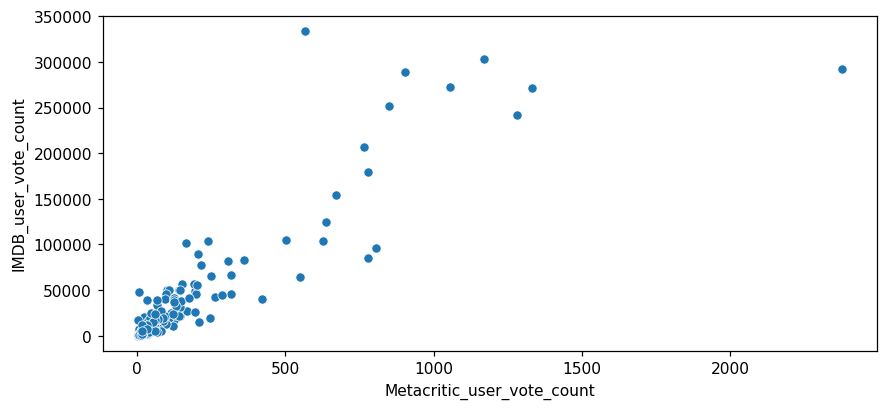

In [39]:
#scatterplot for the relationship between vote counts on MetaCritic versus vote counts on IMDB.

plt.figure(figsize=(9,4),dpi=111)

sns.scatterplot(x=all_sites['Metacritic_user_vote_count'],y=all_sites['IMDB_user_vote_count'])


In [40]:
#movie with the highest IMDB user vote count

all_sites.nlargest(1,'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


In [41]:
#movie with the highest Metacritic User Vote count

all_sites.nlargest(1,'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


In [44]:
#Merging data of Fandango and other websites

mergeddata=pd.merge(fandango,all_sites,how='inner',on='FILM')

In [45]:
mergeddata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   STARS_DIFF                  145 non-null    float64
 6   RottenTomatoes              145 non-null    int64  
 7   RottenTomatoes_User         145 non-null    int64  
 8   Metacritic                  145 non-null    int64  
 9   Metacritic_User             145 non-null    float64
 10  IMDB                        145 non-null    float64
 11  Metacritic_user_vote_count  145 non-null    int64  
 12  IMDB_user_vote_count        145 non-null    int64  
 13  Rotten_Diff                 145 non

In [46]:
mergeddata.head()

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,0.2,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,0.0,98,90,94,8.9,8.6,807,96252,8


In [47]:
mergeddata.describe()

,STARS,RATING,VOTES,STARS_DIFF,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,4.086207,3.841379,3817.696552,0.244828,60.634483,63.696552,58.696552,6.508966,6.729655,184.489655,42572.186207,-3.062069
std,0.541169,0.502437,6368.668671,0.152721,30.161098,19.974749,19.538183,1.510883,0.957944,317.361740,67558.506121,19.218488
min,3.000000,2.700000,35.000000,0.000000,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000,-66.000000
25%,3.500000,3.500000,218.000000,0.100000,31.000000,50.000000,43.000000,5.700000,6.300000,33.000000,5626.000000,-14.000000
50%,4.000000,3.900000,1430.000000,0.200000,63.000000,66.000000,59.000000,6.800000,6.900000,72.000000,18986.000000,0.000000
75%,4.500000,4.200000,4279.000000,0.400000,89.000000,81.000000,75.000000,7.500000,7.400000,167.000000,44711.000000,11.000000
max,5.000000,4.800000,34846.000000,0.500000,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000,42.000000


In [48]:
#Creating new normalized columns for all ratings so they match up within the 0-5 star range shown on Fandango

mergeddata['RottenTomatoesN']=mergeddata['RottenTomatoes'].apply(lambda x:np.round(x*5/100,1))
mergeddata['RottenTomatoes_UserN']=mergeddata['RottenTomatoes_User'].apply(lambda x:np.round(x*5/100,1))
mergeddata['MetacriticN']=mergeddata['Metacritic'].apply(lambda x:np.round(x*5/100,1))
mergeddata['IMDBN']=mergeddata['IMDB'].apply(lambda x:np.round(x*5/10,1))
mergeddata['Metacritic_UserN']=mergeddata['Metacritic_User'].apply(lambda x:np.round(x*5/10,1))

In [49]:
mergeddata.head()

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RottenTomatoesN,RottenTomatoes_UserN,MetacriticN,IMDBN,Metacritic_UserN
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,2.1,1.6
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.6,3.5
2,American Sniper (2015),5.0,4.8,34085,2015,0.2,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.7,3.3
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.7,3.4
4,Inside Out (2015),4.5,4.5,15749,2015,0.0,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.3,4.4


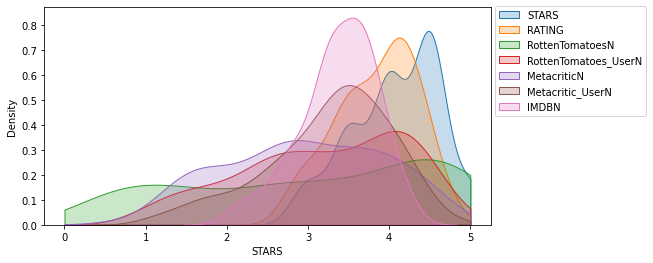

In [51]:
#Creating a plot comparing the distributions of normalized ratings across all sites.

plt.figure(figsize=(8,4))

sns.kdeplot(x=mergeddata['STARS'],shade=True,clip=(0,5),label='STARS')
sns.kdeplot(x=mergeddata['RATING'],shade=True,clip=(0,5),label='RATING')
sns.kdeplot(x=mergeddata['RottenTomatoesN'],shade=True,clip=(0,5),label='RottenTomatoesN')
sns.kdeplot(x=mergeddata['RottenTomatoes_UserN'],shade=True,clip=(0,5),label='RottenTomatoes_UserN')
sns.kdeplot(x=mergeddata['MetacriticN'],shade=True,clip=(0,5),label='MetacriticN')
sns.kdeplot(x=mergeddata['Metacritic_UserN'],shade=True,clip=(0,5),label='Metacritic_UserN')
sns.kdeplot(x=mergeddata['IMDBN'],shade=True,clip=(0,5),label='IMDBN')

plt.legend(loc=(1.01,0.5))

Observation: Fandango display abnormally high ratings

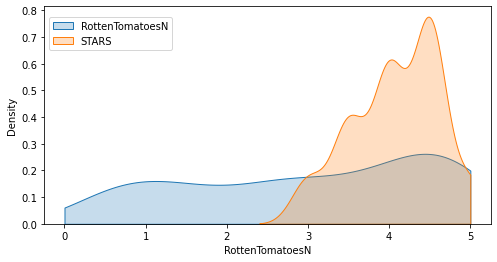

In [52]:
# Creating a plot that compare the distribution of RT critic ratings against the STARS displayed by Fandango.

plt.figure(figsize=(8,4))
sns.kdeplot(x=mergeddata['RottenTomatoesN'],shade=True,clip=(0,5),label='RottenTomatoesN')
sns.kdeplot(x=mergeddata['STARS'],shade=True,clip=(0,5),label='STARS')
plt.legend(loc=(0.01,0.80))



In [55]:
normaliseddata=mergeddata[['STARS','RATING','RottenTomatoesN','RottenTomatoes_UserN','MetacriticN','Metacritic_UserN','IMDBN']]

<AxesSubplot:ylabel='Count'>

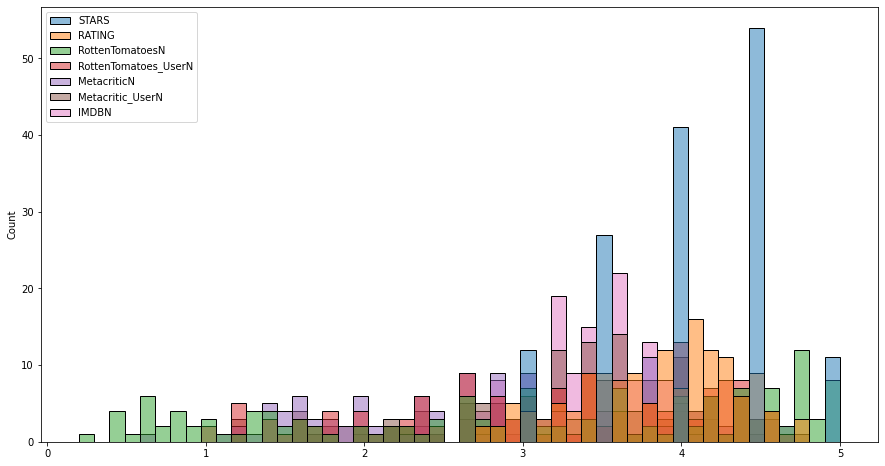

In [56]:
#Creating a histplot comparing all normalized scores.


plt.figure(figsize=(15,8))
sns.histplot(normaliseddata,bins=50)

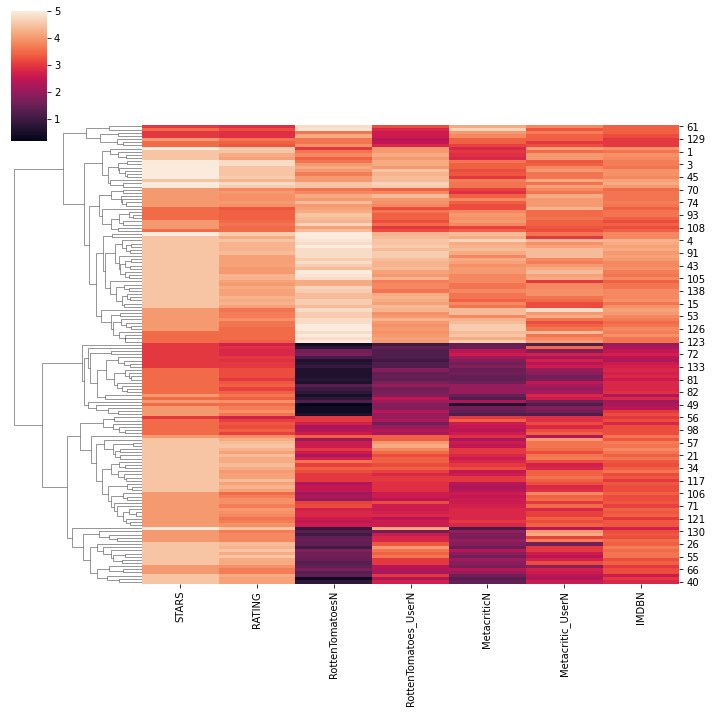

In [57]:
#Creating a clustermap visualization of all normalized scores.

sns.clustermap(normaliseddata,col_cluster=False)

In [296]:
 normaliseddata

,STARS,RATING,RottenTomatoesN,RottenTomatoes_UserN,MetacriticN,Metacritic_UserN,IMDBN
0,5.0,4.5,3.70,4.30,3.30,3.55,3.90
1,5.0,4.5,4.25,4.00,3.35,3.75,3.55
2,5.0,4.5,4.00,4.50,3.20,4.05,3.90
3,5.0,4.5,0.90,4.20,1.10,2.35,2.70
4,3.5,3.0,0.70,1.40,1.45,1.70,2.55
...,...,...,...,...,...,...,...
140,4.0,4.0,4.35,3.90,3.35,3.95,3.70
141,3.5,3.5,4.85,4.10,4.15,3.75,3.60
142,3.5,3.5,4.85,3.90,4.45,4.40,3.70
143,3.5,3.5,5.00,4.05,4.50,3.65,3.90


In [58]:
#Top 10 Worst Movies

top10worstmovies=mergeddata.nsmallest(10,'RottenTomatoesN')[['FILM','STARS','RATING','RottenTomatoesN',"RottenTomatoes_UserN",'MetacriticN','Metacritic_UserN','IMDBN']]

In [59]:
top10worstmovies

,FILM,STARS,RATING,RottenTomatoesN,RottenTomatoes_UserN,MetacriticN,Metacritic_UserN,IMDBN
49,Paul Blart: Mall Cop 2 (2015),3.5,3.5,0.2,1.8,0.6,1.2,2.2
25,Taken 3 (2015),4.5,4.1,0.4,2.3,1.3,2.3,3.0
28,Fantastic Four (2015),3.0,2.7,0.4,1.0,1.4,1.2,2.0
54,Hot Pursuit (2015),4.0,3.7,0.4,1.8,1.6,1.8,2.4
84,Hitman: Agent 47 (2015),4.0,3.9,0.4,2.4,1.4,1.6,3.0
50,The Boy Next Door (2015),4.0,3.6,0.5,1.8,1.5,2.8,2.3
77,Seventh Son (2015),3.5,3.2,0.6,1.8,1.5,2.0,2.8
78,Mortdecai (2015),3.5,3.2,0.6,1.5,1.4,1.6,2.8
83,Sinister 2 (2015),3.5,3.3,0.6,1.7,1.6,2.5,2.8
87,Unfinished Business (2015),3.5,3.2,0.6,1.4,1.6,1.9,2.7


Text(0.5, 1.0, "Ratings for Rotten Tomatoes Critic's 10 Worst Reviewed Films")

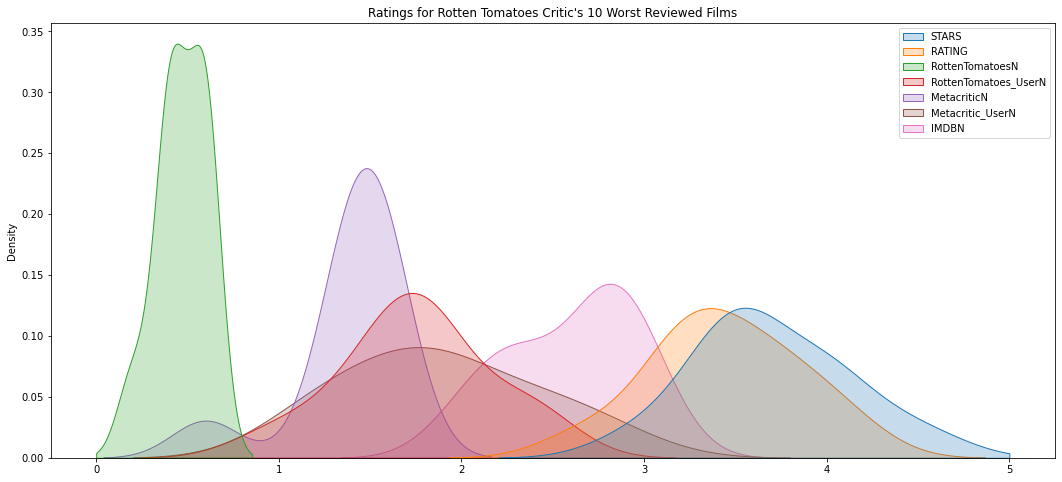

In [60]:
#Visualizing the distribution of ratings across all sites for the top 10 worst movies.

plt.figure(figsize=(18,8))

sns.kdeplot(data=top10worstmovies.drop('FILM',axis=1),shade=True,clip=(0,5))
plt.title("Ratings for Rotten Tomatoes Critic's 10 Worst Reviewed Films")

### Conclusion: Fandango is showing around 3-4 star ratings for films that are clearly bad! Fandango is displaying 4.5 stars on their site for a film with an average rating of 1.86 across the other platforms! (for movie Taken 3)